# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf

# Data Analysis


At first i need to witness if there are missing values inside of our training set.

In [2]:
raw_training_data=pd.read_csv("bitcoin_price_Training - Training.csv")
raw_test_data=pd.read_csv("bitcoin_price_1week_Test - Test.csv")

In [3]:
data=raw_training_data.copy()
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [4]:
for column in data.columns:
    for row in range(0,data.shape[0]):
         if data[column][row]=="-" :
            data[column][row]=None
data.isnull().sum()

C:\Users\MIKED\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

We will remove all of the None values of the Volume column replace it with the mean

In [5]:
X_train=raw_training_data['Volume'].str.replace(",","")
for i in range(0,len(X_train)):
    if X_train[i] != "-":
        X_train[i]=float(X_train[i])

X_train=X_train.replace("-",None)
X_train=X_train.fillna(X_train.mean())
raw_training_data['Volume']=X_train
X_train

0       8.605750e+08
1       7.059430e+08
2       8.037460e+08
3       1.380100e+09
4       7.891040e+08
            ...     
1551    4.686270e+07
1552    4.686270e+07
1553    4.686270e+07
1554    4.686270e+07
1555    4.686270e+07
Name: Volume, Length: 1556, dtype: float64

In [6]:
X_train=raw_training_data["Market Cap"].str.replace(",","")

for i in range(0,len(X_train)):
    if X_train[i] != "-":
        X_train[i]=float(X_train[i])

X_train=X_train.replace("-",None)
raw_training_data['Market Cap']=X_train
X_train

0       4.55358e+10
1       4.48907e+10
2       4.62467e+10
3       4.41444e+10
4       4.18165e+10
           ...     
1551    1.29219e+09
1552    1.54282e+09
1553    1.59778e+09
1554    1.49116e+09
1555    1.50052e+09
Name: Market Cap, Length: 1556, dtype: object

In [7]:
raw_training_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.55358e+10
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.48907e+10
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.62467e+10
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.41444e+10
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.18165e+10
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,4.686270e+07,1.29219e+09
1552,"May 01, 2013",139.00,139.89,107.72,116.99,4.686270e+07,1.54282e+09
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,4.686270e+07,1.59778e+09
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,4.686270e+07,1.49116e+09


In [8]:
raw_test_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


# Analysis

Sort the dataframe by date to make a visualisation

In [9]:
raw_training_data['Date']=pd.to_datetime(raw_training_data['Date'])

C:\Users\MIKED\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Evolution of Market Cap in Time')

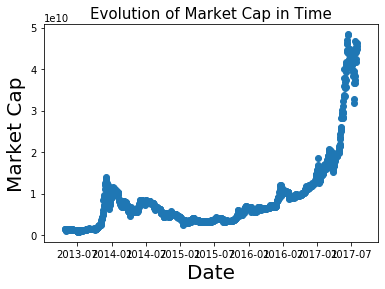

In [10]:
plt.scatter(raw_training_data['Date'],raw_training_data['Market Cap'])
plt.xlabel("Date",fontsize=20)
plt.ylabel("Market Cap",fontsize=20)
plt.title("Evolution of Market Cap in Time",fontsize=15)

# Heatmap

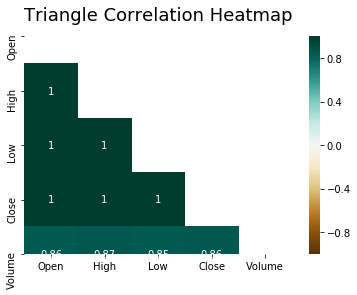

In [11]:
mask = np.triu(np.ones_like(raw_training_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(raw_training_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Linear Regression 1 (remove Volume)


We will use a Linear Regression by removing the  Volume parameter.

In [12]:
X_train=raw_training_data.iloc[:,1:-1]
y_train=raw_training_data.iloc[:,-1:]

We drop the Volume

In [13]:
X_train=X_train.drop(["Volume"],axis=1)

## Feature scaling

In [14]:
standardscaler=StandardScaler()
X_train=standardscaler.fit_transform(X_train)
y_train=standardscaler.fit_transform(y_train)

## Regression

In [15]:
reg=LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.9909580269226416

In [16]:
raw_test_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


We transform the Market Cap into numbers from test_data

In [17]:
X_test=raw_test_data['Market Cap'].str.replace(",","")

for i in range(0,len(X_test)):
    if X_test[i] != "-":
        X_test[i]=float(X_test[i])
raw_test_data['Market Cap']=X_test

We remove Volume

In [18]:
X_test=raw_test_data.iloc[:,1:-1]
X_test=X_test.drop(['Volume'],axis=1) # remove volume from test data
y_test=raw_test_data.iloc[:,-1:]

## Feature scaling test

In [19]:
X_test=standardscaler.fit_transform(X_test)
y_test=standardscaler.fit_transform(y_test)

## Predictions

In [20]:
y_pred=reg.predict(X_test)
y_pred

array([[ 1.45809385],
       [ 1.72892136],
       [-0.34381361],
       [-0.60094721],
       [-1.00065419],
       [-0.8820102 ],
       [-0.35958999]])

In [21]:
y_test

array([[ 1.39398511],
       [ 1.60953766],
       [-0.13659665],
       [-0.57792697],
       [-1.050932  ],
       [-0.96736719],
       [-0.27069995]])

## Plot Data

Text(0.5, 1.0, 'Evolution of Market Cap in Time')

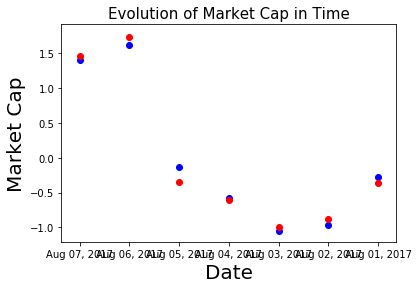

In [22]:
plt.scatter(raw_test_data['Date'],y_test,color="blue")# test data
plt.scatter(raw_test_data['Date'],y_pred,color="red")# predicted data
plt.xlabel("Date",fontsize=20)
plt.ylabel("Market Cap",fontsize=20)
plt.title("Evolution of Market Cap in Time",fontsize=15)

# linear regression 2 (we keep Volume)

Just a linear regression that includes the Volume parameter to see if it is better to keep it rather than leave it

In [23]:
X_train=raw_training_data.iloc[:,1:-1]
y_train=raw_training_data.iloc[:,-1:]

## Feature Scaling train

In [24]:
X_train=standardscaler.fit_transform(X_train)
y_train=standardscaler.fit_transform(y_train)

## Regression

In [25]:
reg=LinearRegression().fit(X_train,y_train)
reg.score(X_train,y_train)

0.9941231868907588

We adapt Volume into numbers

In [26]:
X_test=raw_test_data['Volume'].str.replace(",","")
for i in range(0,len(X_test)):
    if X_test[i] != "-":
        X_test[i]=float(X_test[i])
raw_test_data['Volume']=X_test

In [27]:
X_test=raw_test_data.iloc[:,1:-1]
y_test=raw_test_data.iloc[:,-1:]
y_test

,Market Cap
0,5.29873e+10
1,5.37209e+10
2,4.77782e+10
3,4.62762e+10
4,4.46664e+10
5,4.49508e+10
6,4.73218e+10


## Feature Scaling test

In [28]:
X_test=standardscaler.fit_transform(X_test)
y_test=standardscaler.fit_transform(y_test)

In [29]:
y_pred=reg.predict(X_test)
y_pred

array([[ 1.42139473],
       [ 1.78721245],
       [-0.61564608],
       [-0.56918274],
       [-1.01467663],
       [-0.69247574],
       [-0.31662599]])

## Plot data

Text(0.5, 1.0, 'Evolution of Market Cap in Time')

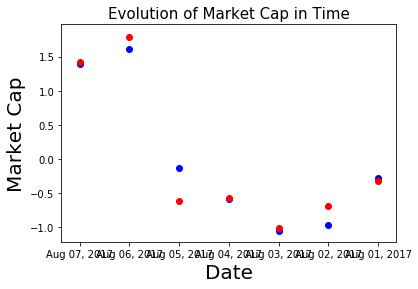

In [53]:
plt.scatter(raw_test_data['Date'],y_test,color="blue")
plt.scatter(raw_test_data['Date'],y_pred,color="red")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Market Cap",fontsize=20)
plt.title("Evolution of Market Cap in Time",fontsize=15)

# Deep learning model

I am trying to make a deep learning model , to see if it is more fitting to make accurate predictions.

In [31]:
X_train=raw_training_data.iloc[:,1:-1]
y_train=raw_training_data.iloc[:,-1:]

## standardize data

In [50]:
standardscaler=StandardScaler()
X_train = standardscaler.fit_transform(X_train)
y_train = standardscaler.fit_transform(y_train)

## Model definition

In [47]:
model = tf.keras.Sequential()


## compile model

In [48]:
# compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## fit the model

first prepare the hyperparameters.

In [49]:
epochs=100
batch=32

In [51]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch)

Train on 1556 samples
Epoch 1/100
1556/1556 [==============================] - 0s 36us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 2/100
1556/1556 [==============================] - 0s 14us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 3/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 4/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 5/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 6/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 7/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 8/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 9/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 10/100
1556/1556 [

1556/1556 [==============================] - 0s 16us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 78/100
1556/1556 [==============================] - 0s 16us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 79/100
1556/1556 [==============================] - 0s 16us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 80/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 81/100
1556/1556 [==============================] - 0s 16us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 82/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 83/100
1556/1556 [==============================] - 0s 14us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 84/100
1556/1556 [==============================] - 0s 13us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 85/100
1556/1556 [==============================] - 0s 15us/sample - loss: -6.8223 - acc: 0.0000e+00
Epoch 86/100
1556/1556 [==========================

## Evaluate the model

In [38]:
loss = model.evaluate(X_train, y_train, verbose=0)

## Make Predictions